#  <center> Taller  de Aprendizaje Automático </center>
##  <center> Taller 6: Fashion MNIST  </center>

En esta actividad se diseñará y entrenará una arquitectura para clasificar las imágenes del dataset *Fashion MNIST*.

## Objetivos

 - Adquirir experiencia práctica en la implementación de redes neuronales con la biblioteca *keras*
 - Evaluar la influencia que tienen en el entrenamiento de una *red profunda* la inclusión de técnicas como *Batch Normalization* o *Dropout* en la arquitectura de la red.
 - Evaluar el impacto de la *inicialización* de los pesos en el entrenamiento de una *red profunda*.
 - Diseñar, entrenar y evaluar arquitecturas para clasificar imágenes.  


<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/TAA-fing/TAA-2025/blob/main/talleres/taller6_Fashion-MNIST.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Ejecutar en Google Colab</a>
  </td>
</table>

In [7]:
from comet_ml import Experiment
import tensorflow as tf
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt
import os
import pandas as pd

Los paquetes faltantes se pueden instalar desde el notebook haciendo:     
*!pip install paquete_faltante*

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 727.1/727.1 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 75.2 MB/s eta 0:00:00
  Attempting uninstall: python-box
    Found existing installation: python-box 7.3.2
    Uninstalling python-box-7.3.2:
      Successfully uninstalled python-box-7.3.2


### Parte 1 - Levantar los datos

Se trabajará con el conjunto de datos *Fashion MNIST* disponible en [*Keras*](https://keras.io/api/datasets/fashion_mnist/). Levantar los datos y separar, de los datos disponibles para entrenamiento, un subconjunto de 10000 muestras para validación.

In [21]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [22]:
x_val = x_train[-10000:]
y_val = y_train[-10000:]

x_train = x_train[:-10000]
y_train = y_train[:-10000]

In [34]:
x_train[27]

array([[  0,   0,   0,   1,   0,   0,   0,   0,   0,  70, 173, 202, 169,
        180, 179, 182, 219, 179,  61,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  32, 180, 237, 248, 232, 234, 255,
        255, 255, 255, 235, 234, 255, 236, 191,  32,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   4,   0,  47, 225, 220, 202, 199, 193, 208, 191,
        205, 179, 218, 211, 181, 202, 212, 226, 230,  59,   0,   1,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 187, 234, 208, 201, 206, 193, 226, 237,
        225, 200, 232, 227, 201, 218, 212, 214, 229, 201,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  23, 229, 207, 202, 195, 198, 201, 192, 244,
        204, 209, 236, 229, 176, 234, 207, 204, 202, 220,  29,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 131, 253, 221, 207, 222, 199, 190, 192, 217,
        231, 187, 254, 217, 205, 219, 209, 200, 201, 232, 128,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 196, 235, 214, 189, 233, 255, 217, 187, 198,
        234, 216, 255, 206, 226, 208, 204, 197, 220, 255, 182,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 205, 226, 231, 208, 193, 222, 247, 224, 186,
        208, 255, 253, 223, 187, 217, 204, 198, 238, 228, 218,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 227, 227, 222, 206, 207, 198, 204, 242, 238,
        192, 231, 240, 232, 237, 255, 251, 209, 236, 209, 227,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 255, 227, 229, 212, 204, 199, 211, 219, 238,
        242, 229, 226, 215, 206, 209, 222, 244, 230, 219, 255,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 233, 234, 233, 218, 201, 209, 191, 216, 202,
        241, 212, 192, 197, 209, 219, 184, 230, 235, 224, 250,   0,   0,
          0,   0],
       [  0,   0,   0,  19, 236, 224, 208, 213, 208, 236, 241, 196, 217,
        231, 188, 204, 210, 197, 218, 188, 243, 221, 220, 255,   0,   0,
          0,   0],
       [  0,   0,   0,  49, 255, 227, 232, 210, 217, 195, 233, 255, 248,
        239, 209, 198, 194, 204, 227, 227, 237, 214, 225, 255,  15,   0,
          0,   0],
       [  0,   0,   0,  84, 255, 224, 255, 203, 217, 236, 223, 255, 255,
        255, 255, 255, 244, 216, 220, 235, 241, 212, 227, 255,  41,   0,
          0,   0],
       [  0,   0,   0,  89, 254, 208, 255, 203, 221, 226, 208, 205, 244,
        239, 243, 247, 218, 209, 185, 211, 232, 224, 223, 253,  54,   0,
          0,   0],
       [  0,   0,   0, 100, 240, 205, 255, 206, 212, 214, 248, 244, 211,
        194, 244, 205, 218, 255, 209, 243, 217, 237, 220, 251,  65,   0,
          0,   0],
       [  0,   0,   0, 117, 236, 197, 251, 222, 204, 240, 207, 222, 221,
        232, 231, 193, 196, 235, 224, 231, 236, 241, 219, 242,  76,   0,
          0,   0],
       [  0,   0,   0, 117, 234, 196, 248, 208, 226, 203, 223, 250, 245,
        245, 248, 226, 204, 253, 242, 245, 244, 243, 216, 241,  83,   0,
          0,   0],
       [  0,   0,   0, 113, 234, 211, 249, 119, 223, 195, 232, 235, 224,
        208, 255, 244, 220, 231, 209, 205, 249, 246, 216, 241,  84,   0,
          0,   0],
       [  0,   0,   0, 114, 233, 218, 250,  57, 235, 219, 217, 214, 252,
        234, 209, 255, 255, 246, 202, 189, 255, 255, 214, 242,  93,   0,
          0,   0],
       [  0,   0,   0, 131, 228, 218, 237,  41, 249, 227, 197, 204, 255,
        233, 224, 226, 216, 250, 238, 192, 207, 236, 215, 231, 118,   0,
          0,   0],
       [  0,   0,   0, 136, 209, 224, 189,  50, 255, 210, 218, 241, 217,
        243, 215, 190, 201, 195, 201, 212, 162, 192, 228, 226, 149,   0,
          0,   0],
       [  0,   0,   0, 138, 208, 243, 148,  45, 255, 230, 234, 201, 206,
        211, 244, 219, 207, 209, 200, 225, 151, 166, 226, 215, 144,   0,
          0,   0],
       [  0,   0,   0, 133, 206, 243, 117,   0, 234, 212, 210, 208, 211,
        208, 212, 220, 208, 203, 201, 220,  93, 133, 228, 222, 154,   0,
          0,   0],
       [  0,   0,   0, 135, 226, 226,  9

### Parte 2  - Exploración de datos

Como es habitual, una buena práctica es explorar los datos para familiarizarse con el problema. En este caso, además de en keras, el *dataset* está disponible en *Tensorflow Datasets*.

Conteste a las siguientes preguntas:        
    - ¿Cuántas imágenes hay disponibles? ¿De qué tamaño son?       
    - ¿Cuál es el tipo de dato? ¿Es adecuado?         
Muestre un ejemplo de cada clase.

Hay 50.000 imágenes disponibles para entrenamiento, 10.000 para validación y 10.000 para test. Son de 28x28 pixels.

El tipo de dato es uint8, 8 bits sin signo, 256 valores posibles, 256 intensidades diferentes de grices.

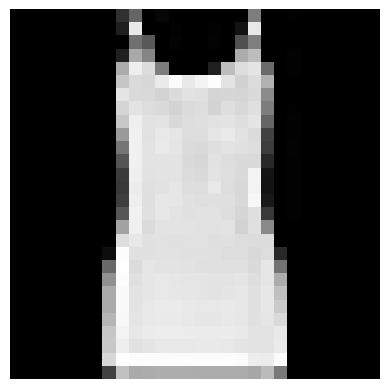

In [18]:
plt.imshow(x_train[222], cmap='gray')  # Use 'gray' for grayscale images
plt.axis('off')  # Optional: Turn off axis labels and ticks
plt.show()

### Parte 3 - Un primer modelo

Construya una red neuronal totalmente conectada de 20 capas y 100 neuronas por capa. Para ello se sugiere completar la implementación de la función `fully_connected_model`. Utilice *relu* como función de activación y *sgd* como optimizador.  Indique cuántos parámetros tiene la red.

In [31]:
def fully_connected_model(input_shape, n_hiddens, n_neurons, activation='relu',
                        optimizer='sgd', learning_rate = 1e-3):

    '''
    Entrada:
        input_shape: [M,N]
        n_hiddens: número de capas ocultas
        n_neurons: número de neuronas en cada capa oculta
        activation: función de activación de las neuronas. Por defecto 'relu'.
        optimizer: método de optimización. Por defecto 'sgd'.
        learning_rate: tasa de aprendizaje del optimizador. Por defecto 1e-3.
    Salida:
        model: modelo generado
    '''

    model = keras.Sequential()

    model.add(keras.layers.Input(shape=input_shape))

    model.add(keras.layers.Flatten())

    for i in range(n_hiddens):
      model.add(keras.layers.Dense(n_neurons, activation=activation))

    model.add(keras.layers.Dense(10, activation="softmax"))

    opt_dict = {
        'sgd': keras.optimizers.SGD,
        'adam': keras.optimizers.Adam,
    }

    optimizer_class = opt_dict.get(optimizer)

    optimizer_inst = optimizer_class(learning_rate=learning_rate)

    model.compile(
        loss="sparse_categorical_crossentropy",
        optimizer=optimizer_inst,
    )

    return model

### Parte 4 -  Un primer entrenamiento

Entrene el modelo generado en la parte anterior durante 10 épocas para los siguientes valores de *learning rate*: [1e-4, 5e-4, 1e-3, 5e-3, 1e-2]. Muestre los desempeños en los conjuntos de entrenamiento y validación.

In [32]:
model = fully_connected_model(
    input_shape=[28,28],
    n_hiddens=20,
    n_neurons=100
)



### Parte 5: - Cambio de Inicialización

**5a)** Repita el experimento pero cambiando el método de inicialización de los pesos. En vez de utilizar la inicialización por defecto, utilice 'he_normal'. Comente como cambian los resultados.

**5b) (opcional):** Probar otras formas de inicialización. Por ejemplo, ¿Qué pasa si se utiliza 'random_normal'?

### Parte 6 - Batch Normalization

Modifique la implementación de la función *fully_connected_model* para que admita la posibilidad de agregar capas de *batch normalization*. En caso de utilizar *batch normalization* coloque dichas capas luego de las capas densas y antes de las activaciones, tal como fue propuesto en el [paper original](https://arxiv.org/pdf/1502.03167.pdf).

**6a)** ¿Cuántos parámetros tiene el modelo con *batch normalization*? ¿Qué son y para que se usan los *Non-trainable-parameters*?

**6b)** Repita el experimento de la **parte 4** pero ahora utilizando el modelo con *batch normalization*. Para este experimento vuelva a la inicialización de los pesos por defecto ('glorot_uniform').

### Parte 7 -  Optimizador

**Parte 7a)** De ser necesario, modifique la implementación de la función `fully_connected_model()` para que permita optimizar utilizando el método *adam*. Repita el experimento de la **parte 4** pero modificando solamente el optimizador. Comente los cambios que observa.

**Parte 7b)** ¿Cambian los resultados del entrenamiento si en la parte anterior además de cambiar el optimizador se agrega *batch normalization* ?

### Parte 8  -  Red Neuronal Convolucional

**8a)** Escribir una función similar a la de la **parte 3** pero que construya una red neuronal convolucional con la siguiente arquitectura:
    
N * [Conv2D --> Conv2D --> Pool2D] → Flatten → Dense → Dense.

donde *N* representa la cantidad de bloques [Conv2D --> Conv2D --> Pool2D] a utilizar.

**8b)** Entrenar una realización de la red. Por ejemplo, utilizar:
- N=2
- 64 filtros de convolución de tamaño 3 en la primera capa del bloque
- 32 filtros de convolución de tamaño 3 en la segunda capa del bloque
- 128 neuronas en la primera capa densa

**8c)** ¿Cuántos parámetros tiene el modelo?

### Parte 9 - Entrenar la mejor arquitectura posible

En esta parte el objetivo será entrenar el mejor clasificador posible para *Fashion MNIST*. La única restricción es que el modelo de arquitectura tendrá que ser como el de la **parte 3** o como el de la **parte 8**. En ambos casos se podrán evaluar las siguientes variaciones:     
    - Número de capas y neuronas por capa en el modelo de la **parte3**     
    - Número de bloques, cantidad de filtros de bloque y tamaño de los filtros en el caso del modelo de la **parte 8**              
    - Distintas funciones de activación y métodos de inicialización de pesos     
    - Agregado de *Batch Normalization* y/o *Dropout*    
    - Distintos métodos de optimización y sus parámetros     

Para entrenar los modelos se recomienda la utilización de alguno de los [callbacks](https://keras.io/callbacks/) disponibles en *keras*. Por ejemplo: *early stopping* y *model checkpoint*.